라이브러리

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. 가중치 초깃값이 중요한 이유
    - 신경망 학습의 성패를 좌우하는 핵심 : 초깃값을 어떻게 설정하느냐
        - 학습 초기의 가중치는 매우 중요하다.
        - 잘못된 초깃값은 학습을 방해하거나 불가능하게 만든다.

2. 가중치를 0으로 초기화하면?
    - 모든 가중치가 동일하게 갱신되기 때문에 학습이 제대로 이뤄지지 않는다.
    - 가중치는 반드시 무작위로 초기화해야 한다.


3. 은닉층 활성화값 분포 분석
    -  은닉층의 활성화값(=출력값)이 어떻게 분포하는지 살펴보면 좋은 초깃값을 찾을 수 있다.



- 3.1 시뮬레이션 코드


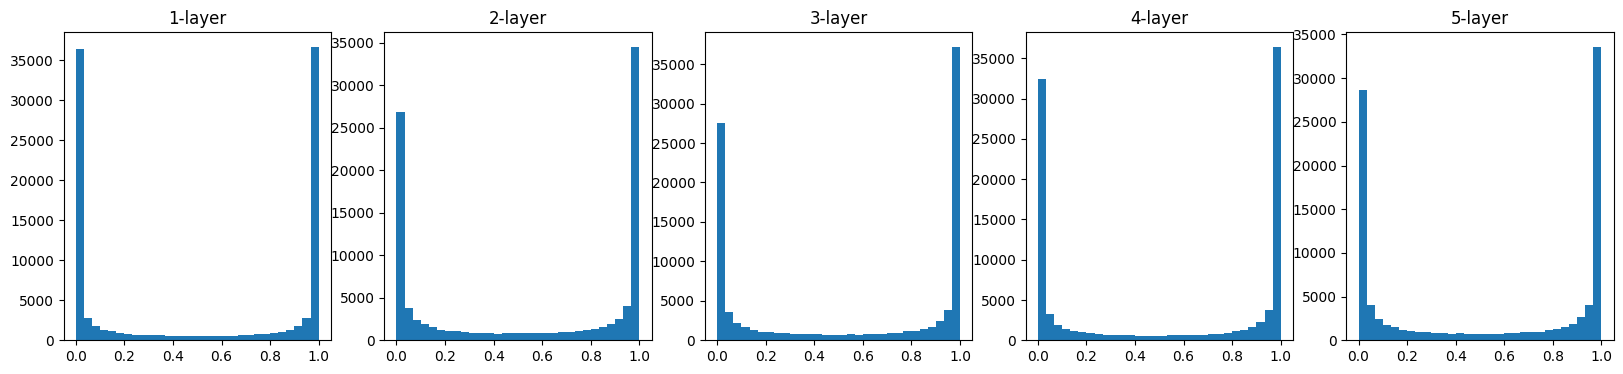

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 입력 데이터
node_num = 100                  # 은닉층 뉴런 수
hidden_layer_size = 5            # 은닉층 개수
activations = {}

plt.figure(figsize=(20, 4))  # <<< 추가: 그림 전체 크기 조절 (가로 20, 세로 4)

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 1  # 표준편차 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

    # 히스토그램 그리기
    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(z.flatten(), 30, range=(0,1))

plt.show()


- 3.2 결과 분석
    - 표준편차 1로 초기화하면:
        - 활성화값이 0과 1에 치우침
        - → 기울기 소실 (gradient vanishing) 발생

    - 표준편차 0.01로 줄이면
        - 출력이 0.5 근처에 몰림
        - → 학습 표현력이 급격히 떨어짐


4. Xavier 초깃값 (Sigmoid, Tanh 전용)
    - Xavier Glorot와 Yoshua Bengio가 제안.
    - 초깃값 표준편차를 다음과 같이 설정
        - $\sigma = \frac{1}{n}$
            - $n$ : 앞 층 뉴런 수
    - 특징
        - 층이 깊어져도 활성화값이 퍼지거나 사라지지 않고 고르게 유지된다.
        - Sigmoid, tanh 같은 "원점 대칭" 함수에 적합하다.







5. He 초깃값 (ReLU 전용)
    - Kaiming He가 제안.
        - ReLU는 음수 영역을 0으로 만들기 때문에 Xavier보다 조금 더 퍼지게 해야 한다.
        - 초깃값 표준편차
            - $\sigma = \frac{2}{n}$
        - 특징
            - ReLU 함수에 최적화되어 활성화값이 모든 층에서 균일하게 퍼진다.
            - 기울기 소실 문제를 더 잘 방지한다.




6. 비교 요약

| 항목 | 설명 | 사용 함수 |
|:----|:-----|:---------|
| 기본 초깃값 (std=1) | 활성화값이 0/1에 몰림, 기울기 소실 | 사용 안 함 |
| std=0.01 | 값이 0.5 근처에 몰림, 표현력 감소 | 사용 안 함 |
| Xavier 초깃값 | 균일한 분포 유지, 활성화 함수가 선형/대칭일 때 적합 | Sigmoid, tanh |
| He 초깃값 | 깊은 네트워크에서도 균일한 분포, ReLU 최적화 | ReLU |
